# The Sparks Foundation #GRIPJUNE2021

# Data Science & Business Analytics Tasks
# BY- Akshit Bagri

## Exploratory Data Analysis - Terrorism(TASK 4)

## Importing Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Importing the dataset

In [2]:
dataset = pd.read_csv("globalterrorismdb_0718dist.csv", encoding= 'ISO-8859-1', low_memory= False)

In [3]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## Cleaning Data

In [63]:
#Since there are 135 Columns. We will take those columns which will be more helpful for our Analysis
dataset.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Duration','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','natlty1_txt':'Nationality','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','ishostkid':'Host'},inplace=True)
terror = dataset[['Year','Month','Day','Duration','Country','Region','city','latitude','longitude','success','suicide','AttackType','Target','Nationality','Group','Motive','Weapon_type','Killed','Wounded','Summary','Target_type','Host']]
terror['Casualties']= terror['Killed'] + terror['Wounded']
terror.head(5)

<ipython-input-63-25e1a7fa300e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,Day,Duration,Country,Region,city,latitude,longitude,success,...,Nationality,Group,Motive,Weapon_type,Killed,Wounded,Summary,Target_type,Host,Casualties
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,...,Dominican Republic,MANO-D,NaN,Unknown,1.0,0.0,NaN,Private Citizens & Property,0.0,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,...,Belgium,23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,Government (Diplomatic),1.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,...,United States,Unknown,NaN,Unknown,1.0,0.0,NaN,Journalists & Media,0.0,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,1,...,United States,Unknown,NaN,Explosives,NaN,NaN,NaN,Government (Diplomatic),0.0,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,...,United States,Unknown,NaN,Incendiary,NaN,NaN,NaN,Government (Diplomatic),0.0,NaN


In [64]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Duration            0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
success             0
suicide             0
AttackType          0
Target            636
Nationality      1559
Group               0
Motive         131130
Weapon_type         0
Killed          10313
Wounded         16311
Summary         66129
Target_type         0
Host              178
Casualties      16874
dtype: int64

## Exploratory Data Analysis (EDA)

In [7]:
print("Country With Highest Terrorist Attacks:", terror['Country'].value_counts().index[0])
print("Region With Highest Terrorist Attacks:", terror['Region'].value_counts().index[0])
print("Most Casaulties in an Attack were:", terror['Casualties'].max()," , Which took place in the Country",terror.loc[terror['Casualties'].idxmax()].Country)

Country With Highest Terrorist Attacks: Iraq
Region With Highest Terrorist Attacks: Middle East & North Africa
Most Casaulties in an Attack were: 9574.0  , Which took place in the Country United States


### Number of Terriorst Attacks Each Year

C:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


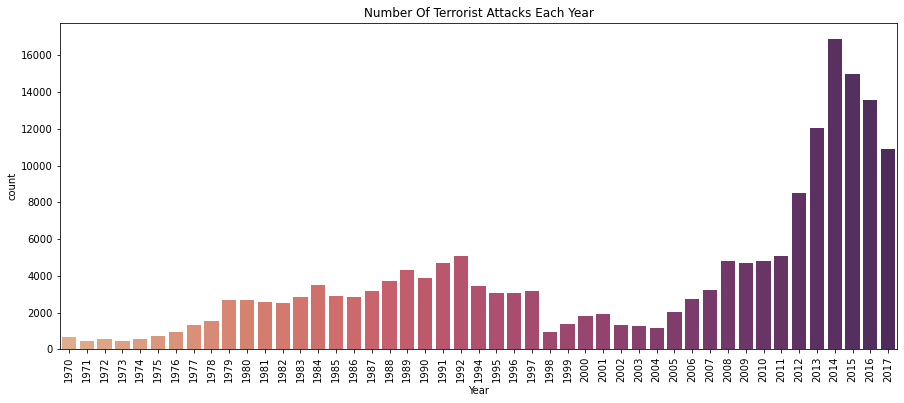

In [8]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='flare')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Each Year')
plt.show()

### Number of Casualties Each Year

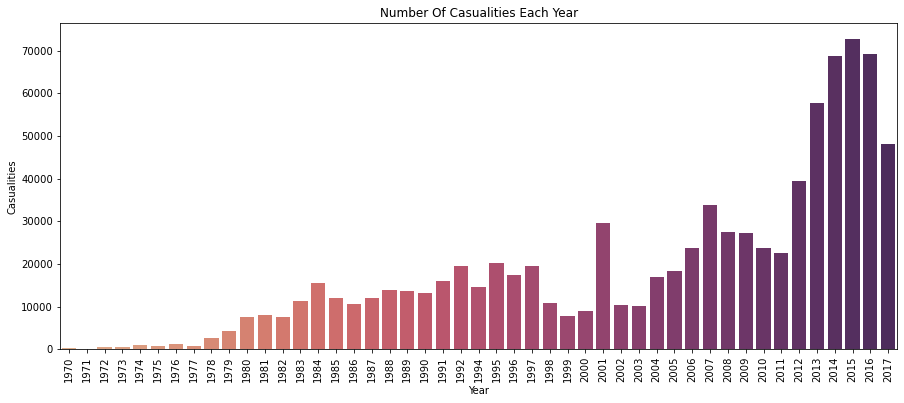

In [9]:
plt.subplots(figsize=(15,6))
year_cas = terror.groupby('Year').Casualties.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualties']
sns.barplot(x=year_cas.Year, y=year_cas.Casualties, palette='flare')
plt.xticks(rotation=90)
plt.title('Number Of Casualties Each Year')
plt.show()

### Attacks Categorized By Unsuccessful and Successful 

Text(0.5, 1.0, 'successful and Unsuccessful Attacks')

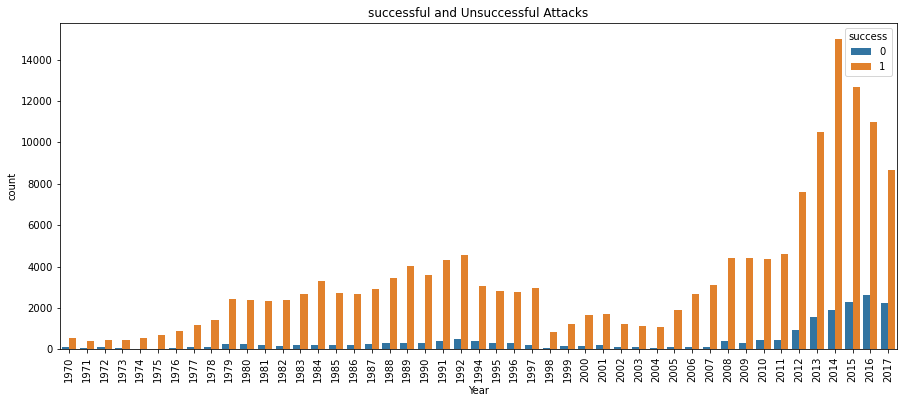

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Year', hue='success', data=terror)
plt.xticks(rotation=90)
plt.title('successful and Unsuccessful Attacks')

### Global Terrorist Attacks in World Map

In [62]:
terr = terror.groupby(['Country'], as_index=False).count()
px.choropleth(terr, locations='Country', locationmode='country names', color='Year', hover_name='Country', title='Global Terrorist Attacks(1970-2017)', labels={'Year':'Attacks'})

### Terrorism By Top 15 Affected Countries

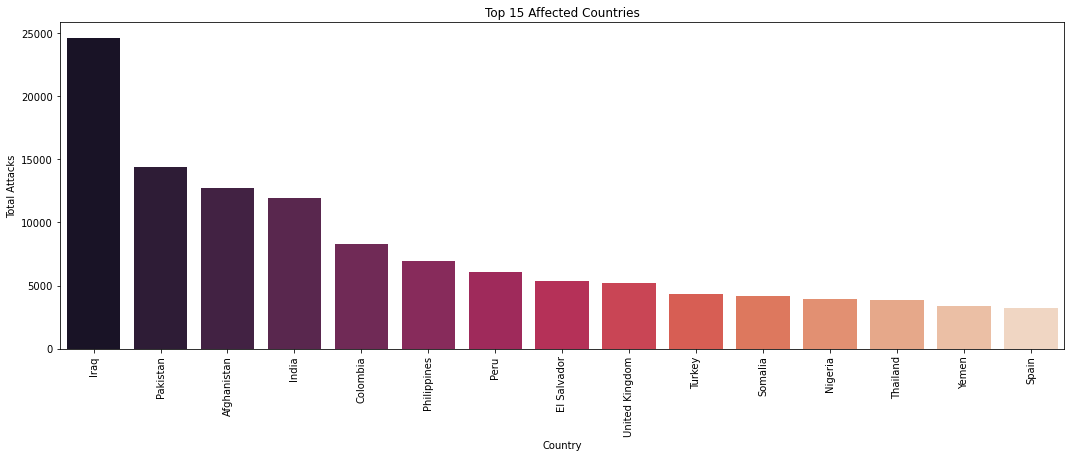

In [11]:
plt.subplots(figsize=(18,6))
country_attacks = terror.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'rocket')
plt.xticks(rotation=90)
plt.title('Top 15 Affected Countries')
plt.show()

### Casualties in Top 15 Affected Countries

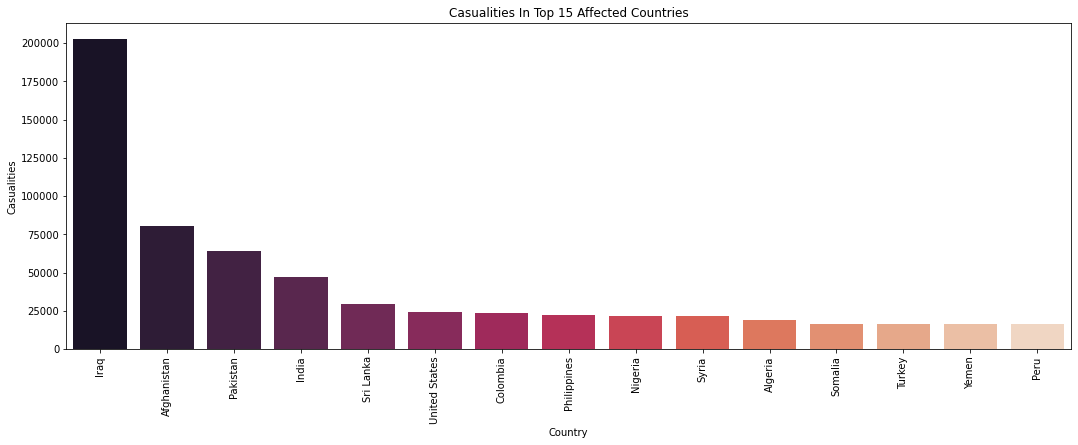

In [24]:
plt.subplots(figsize=(18,6))
country_cas = terror.groupby('Country').Casualties.sum().to_frame().reset_index().sort_values('Casualties', ascending=False)[:15]
sns.barplot(x=country_cas.Country, y=country_cas.Casualties, palette= 'rocket')
plt.xticks(rotation=90)
plt.title('Casualties In Top 15 Affected Countries')
plt.show()

### Terrorism By Affected Cities

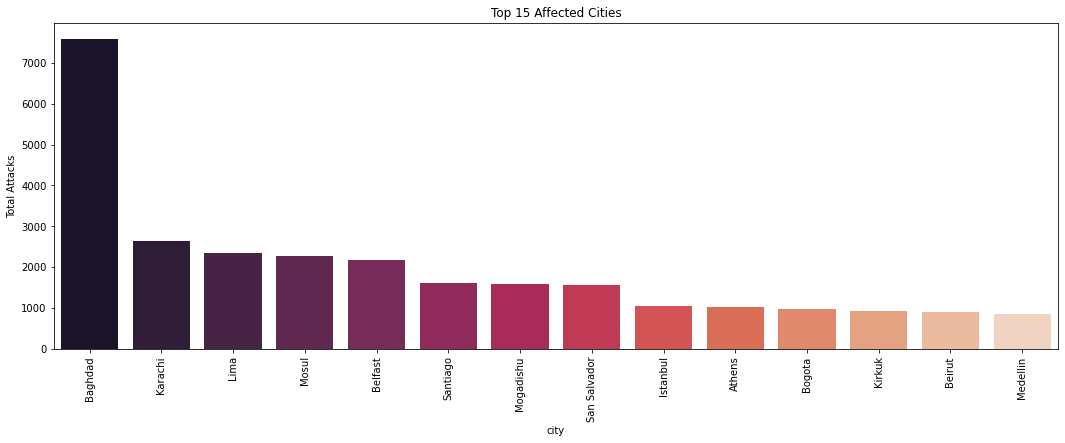

In [19]:
plt.subplots(figsize=(18,6))
city_attacks = terror.city.value_counts()[:15].drop('Unknown').reset_index()
city_attacks.columns = ['city', 'Total Attacks']
sns.barplot(x=city_attacks.city, y=city_attacks['Total Attacks'], palette= 'rocket')
plt.xticks(rotation=90)
plt.title('Top 15 Affected Cities')
plt.show()

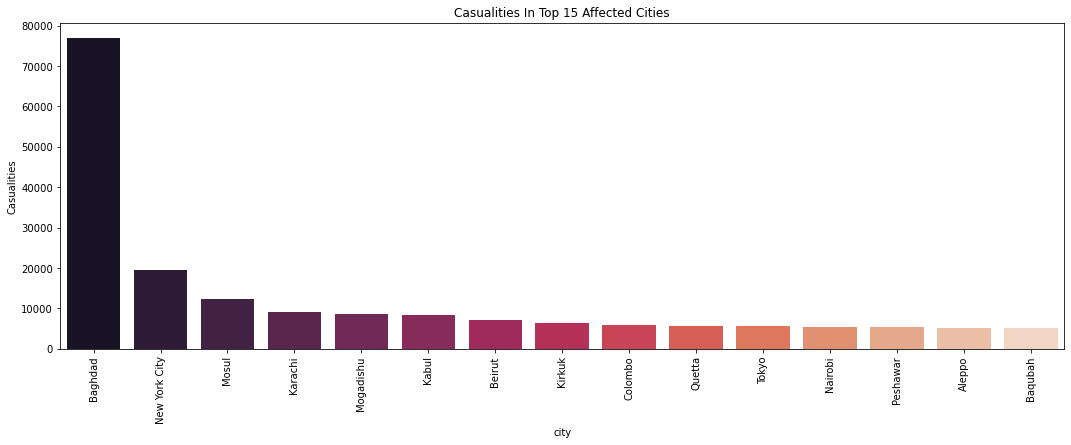

In [23]:
plt.subplots(figsize=(18,6))
city_cas = terror.groupby('city').Casualties.sum().to_frame().drop('Unknown').reset_index().sort_values('Casualties', ascending=False)[:15]
sns.barplot(x=city_cas.city, y=city_cas.Casualties, palette= 'rocket')
plt.xticks(rotation=90)
plt.title('Casualties In Top 15 Affected Cities')
plt.show()

### Number of Total Attacks and Casualties By Region

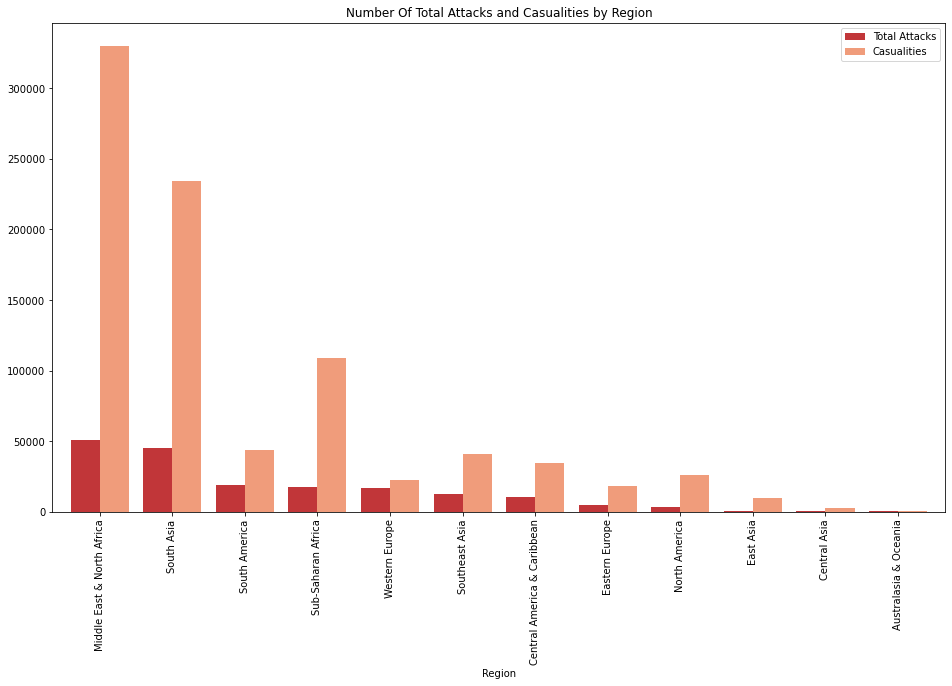

In [26]:
region_attacks = terror.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
region_cas = terror.groupby('Region').Casualties.sum().to_frame().reset_index()
region_cas.columns = ['Region', 'Casualties']
# city_cas.drop('Unknown', axis=0, inplace=True)
region_tot = pd.merge(region_attacks, region_cas, how='left', on='Region').sort_values('Total Attacks', ascending=False)
# fig = plt.figure()
# fig.subplots()
sns.set_palette('RdBu')
region_tot.plot.bar(x='Region', width=0.8)
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks and Casualties by Region')
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show()

### Attack Type vs Region

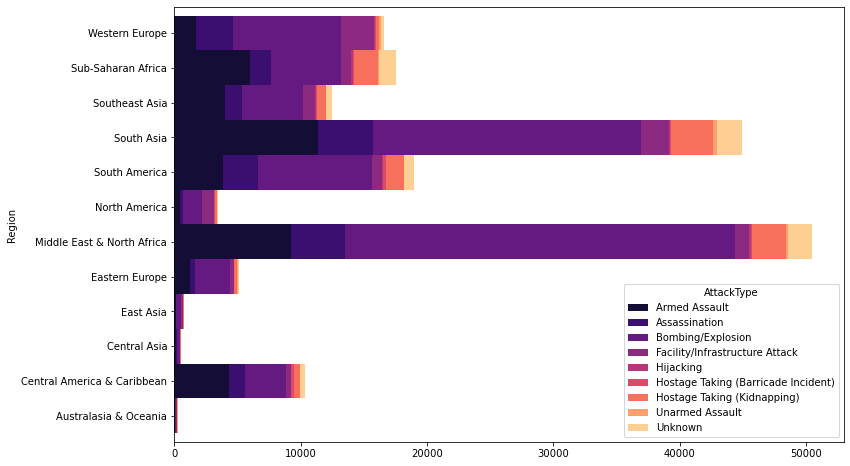

In [28]:
pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('magma',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

### Trend in Terrorist Attack by Region

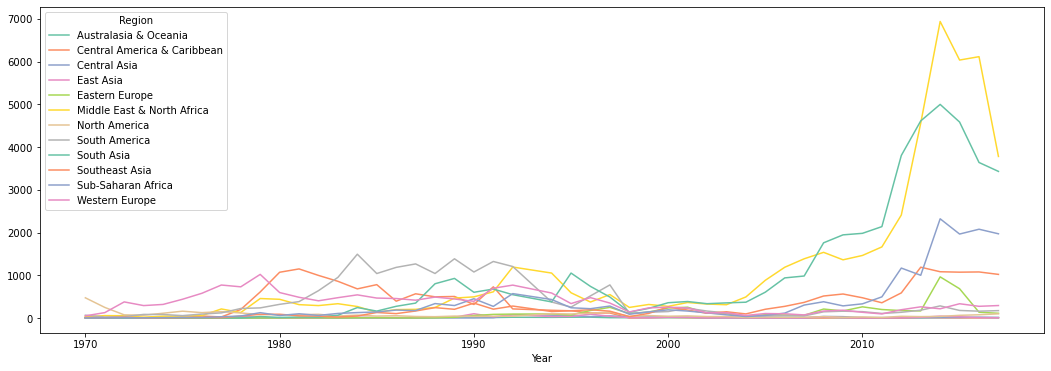

In [29]:
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### Most Targeted By Terrorist

C:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


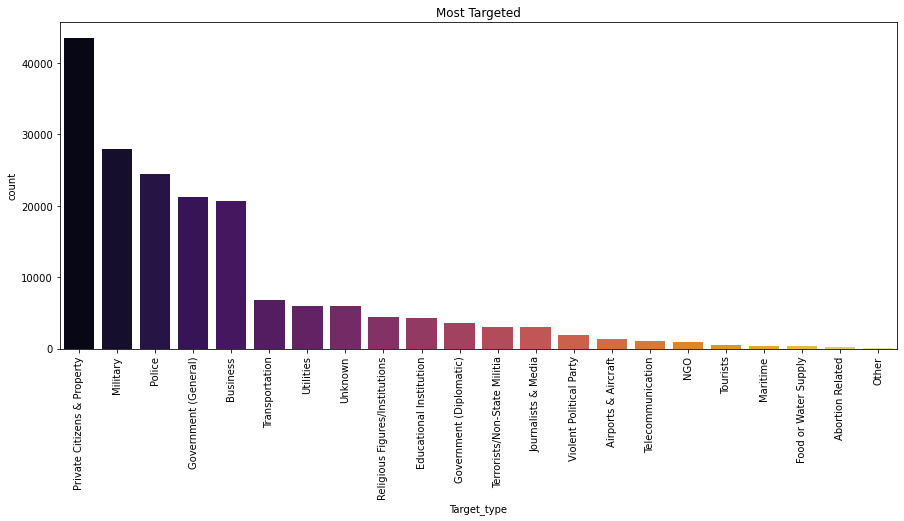

In [30]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Most Targeted')
plt.show()

### Most Dangerous Organizations

C:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


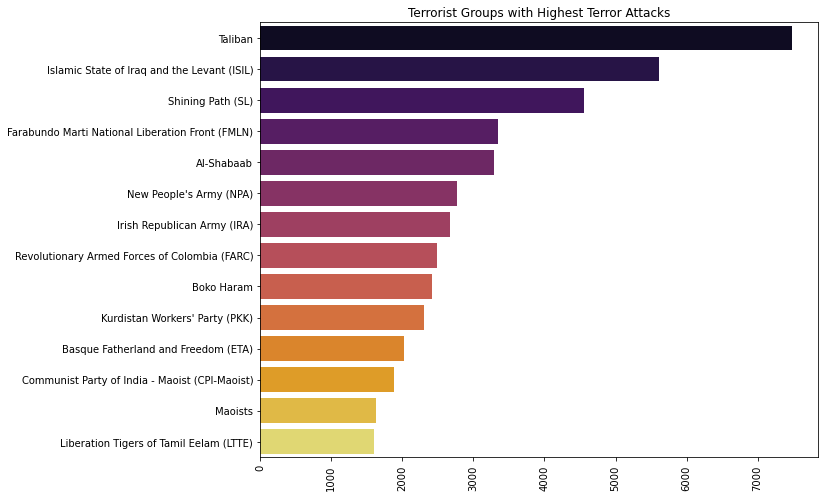

In [31]:
sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

### Activity of Top Terrorist Groups

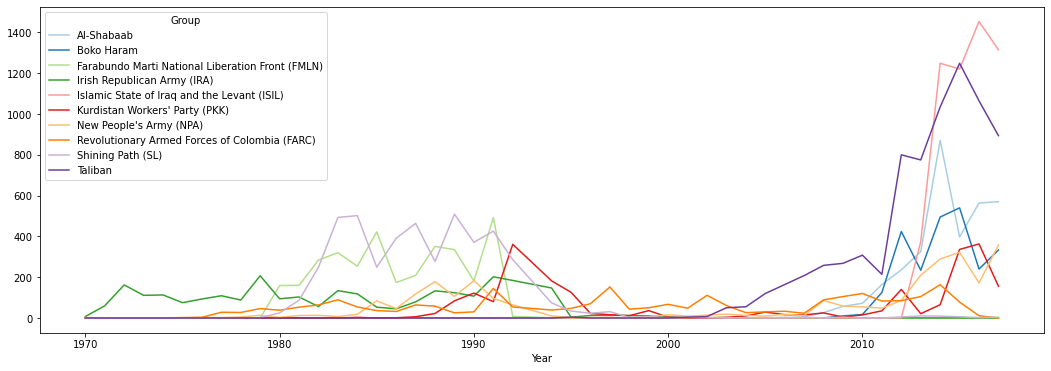

In [32]:
top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### Looking At India's Data

In [38]:
india_attacks = terror[terror.Country=='India'].reset_index()
india_attacks.city = india_attacks.city
india_attacks.head()

,index,Year,Month,Day,Duration,Country,Region,city,latitude,longitude,...,Nationality,Group,Motive,Weapon_type,Killed,Wounded,Summary,Target_type,Host,Casualities
0,1186,1972,2,22,0,India,South Asia,New Delhi,28.585836,77.153336,...,Germany,Palestinians,NaN,Explosives,0.0,0.0,NaN,Airports & Aircraft,1.0,0.0
1,2764,1975,1,2,0,India,South Asia,Samastipur,25.863042,85.781004,...,India,Ananda Marga,Unknown,Explosives,4.0,0.0,"1/2/1975: The Indian Railway Minister, Lalit N...",Government (General),0.0,4.0
2,3857,1976,5,26,0,India,South Asia,New Delhi,28.585836,77.153336,...,India,Unknown,NaN,Explosives,0.0,0.0,NaN,Airports & Aircraft,0.0,0.0
3,5327,1977,9,28,0,India,South Asia,Bombay,19.075984,72.877656,...,Japan,Japanese Red Army (JRA),NaN,Firearms,0.0,0.0,NaN,Airports & Aircraft,1.0,0.0
4,7337,1979,1,13,0,India,South Asia,Unknown,26.200605,92.937574,...,India,Naga People,NaN,Firearms,NaN,NaN,NaN,Police,0.0,NaN


In [48]:
print("Between",india_attacks.Year.min(), "and",india_attacks.Year.max(), ",a total of ", india_attacks.city.nunique(), " cities were targeted by ", india_attacks.Group.nunique(), "distinct terrorist groups, according to the statistics. In total,", india_attacks.index.nunique(), " terrorist attacks have been documented here, resulting in around", int(india_attacks.Casualties.sum()), "Casualties, consisting of", int(india_attacks.Killed.sum()), "dead and", int(india_attacks.Wounded.sum()), "injured.")

Between 1972 and 2017 ,a total of  4798  cities were targeted by  301 distinct terrorist groups, according to the statistics. In total, 11960  terrorist attacks have been documented here, resulting in around 47108 casualities, consisting of 19341 dead and 28980 injured.


In [49]:
india_attacks.city.value_counts()

Srinagar             658
Unknown              624
Imphal               426
New Delhi            157
Amritsar             138
                    ... 
Batabari               1
Kollam                 1
Murtunda               1
Arengdo                1
Damhal Hanji Pora      1
Name: city, Length: 4798, dtype: int64

C:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



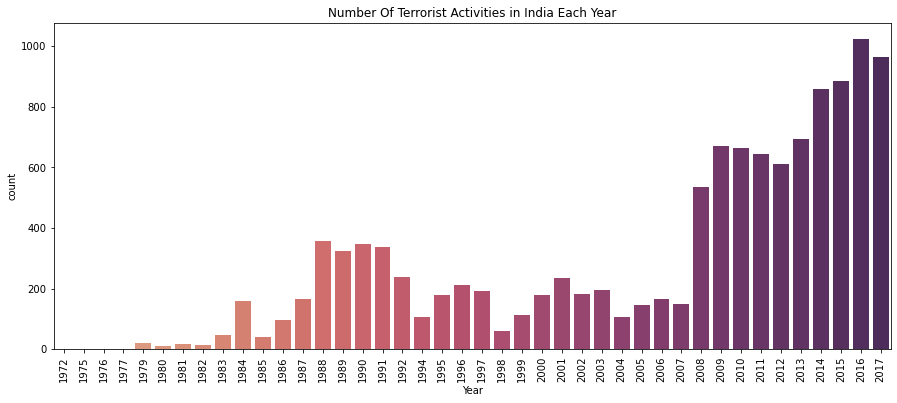

In [51]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=india_attacks,palette='flare')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities in India Each Year')
plt.show()

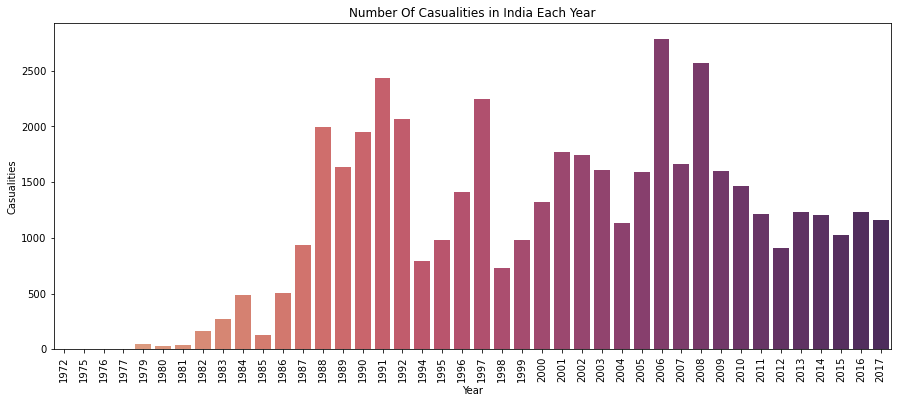

In [52]:
plt.subplots(figsize=(15,6))
year_cas_india = india_attacks.groupby('Year').Casualties.sum().to_frame().reset_index()
year_cas_india.columns = ['Year','Casualties']
sns.barplot(x=year_cas_india.Year, y=year_cas_india.Casualties, palette='flare')
plt.xticks(rotation=90)
plt.title('Number Of Casualties in India Each Year')
plt.show()

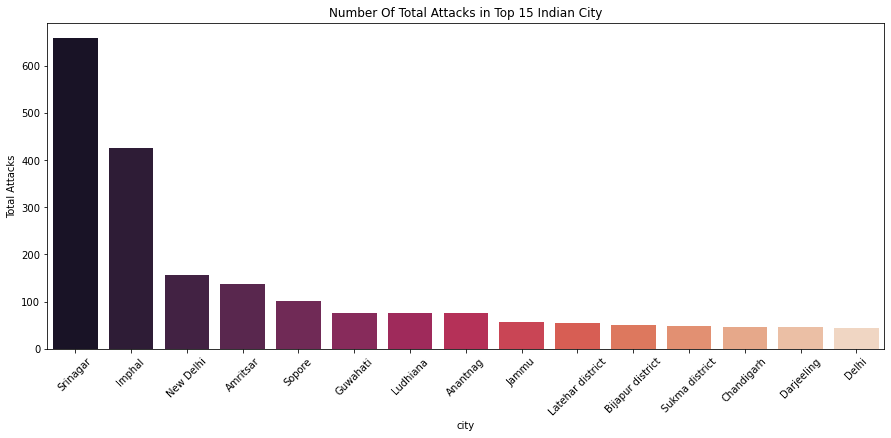

In [59]:
plt.subplots(figsize=(15,6))
city_attacks_india = india_attacks.city.value_counts()[:16].drop('Unknown').reset_index()
city_attacks_india.columns = ['city', 'Total Attacks']
sns.barplot(x=city_attacks_india.city, y=city_attacks_india['Total Attacks'], palette='rocket')
plt.xticks(rotation=45)
plt.title('Number Of Total Attacks in Top 15 Indian City')
plt.show()

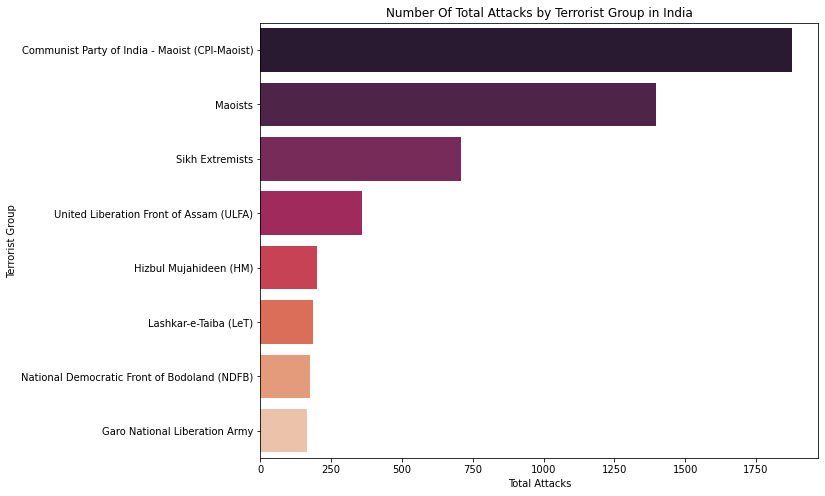

In [61]:
india_group_attacks = india_attacks.Group.value_counts().to_frame().drop('Unknown').reset_index()[:8]
india_group_attacks.columns = ['Terrorist Group', 'Total Attacks']
plt.subplots(figsize=(10,8))
sns.barplot(y=india_group_attacks['Terrorist Group'], x=india_group_attacks['Total Attacks'], palette='rocket')
plt.title('Number Of Total Attacks by Terrorist Group in India')
plt.show()

# CONCLUSION/Insights
### Country With Highest Terrorist Attacks: Iraq
### Region With Highest Terrorist Attacks: Middle East & North Africa
### Most Casaulties in an Attack were: 9574.0  , Which took place in the Country United States
### There was a sudden Increase in Attacks after the year 1979. Then there was a Decrease during the period 1998-2004. Then after 2004 the Terrorist Activities Increased Sharply.